In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


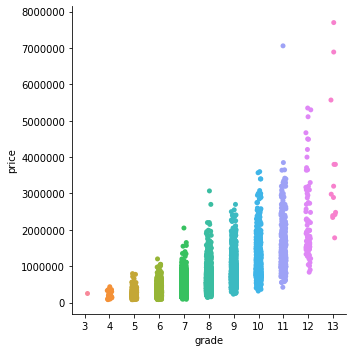

In [4]:
sns.catplot(x='grade',y='price',data=df,orient='v')

In [5]:
grades = df.grade.unique()
grades.sort()

In [6]:
grades

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [7]:
mean_prices = df.loc[df.grade==g,'price'].mean() for g in grades]

SyntaxError: invalid syntax (<ipython-input-7-dc32acf8994b>, line 1)

In [8]:
import plotly.express as px

In [9]:
fig = px.scatter_mapbox(df, lat='lat', long='long', color='price'
                       size='sqft_living')

SyntaxError: invalid syntax (<ipython-input-9-b69f184e818a>, line 2)

In [ ]:
px.set_mapbox_access_token(open(".mapbox_token").read()) fig = px.scatter_mapbox(df, lat="lat", lon="long", color="price", size='sqft_living',          color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10) fig.show() 

In [24]:
df['log_sqft_living'] = np.log(df['sqft_living'])

In [25]:
X = df[['log_sqft_living','condition','grade']]
y=df['price']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [28]:
ols = LinearRegression(fit_intercept=False,normalize=False)

In [29]:
ols.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [30]:
ols.score(X_train,y_train)

0.39212343803914984

In [31]:
ols.score(X_test,y_test)

0.3563018444422543

In [1]:
x_sample = df.sample(n=1)
x_sample.drop('log_sq')

NameError: name 'df' is not defined

In [10]:
def condition_data(x_sample):
    x_sample['log_sqft_living'] = np.log(x_sample['sqft_living'])
    return x_sample

def predict_price(x_sample):
    x_sample_final  = condition_data(x_sample)
    cols = ['log_sqft_living','condition','grade']
    target = 'price'
    x_sample_final = x_sample[cols]
    return ols.predict(x_sample_final)[0]

In [11]:
ols.predict(x_sample_final)[0]

NameError: name 'ols' is not defined

In [ ]:
predict_price(x_sample)